## Explore the Customer Data

In [0]:
df = spark.read.option('inferSchema', True).json("dbfs:/FileStore/online_retail/customers.json", multiLine=True)
display(df.limit(5))
df.count()

CustomerID,FirstName,Gender,LastName,Region,SSN
C0001,Gregory,M,Miller,Ohho,082573197
C0002,Marvin,male,null,california,309-6256-21
C0003,Gregory,Male,Smith,New Yorkk,407071725
C0004,Edward,male,Davis,Ohho,948.18.5740
C0005,Reginald,male,Dawson,Texas,975.72.3056


Out[49]: 1100

In [0]:
df.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- SSN: string (nullable = true)



In [0]:
from pyspark.sql.functions import regexp_replace

df_fixed = df.withColumn("ssn", regexp_replace("ssn", r'\D', ''))
display(df_fixed.limit(10))
df_fixed.count()

CustomerID,FirstName,Gender,LastName,Region,ssn
C0001,Gregory,M,Miller,Ohho,082573197
C0002,Marvin,male,null,california,309625621
C0003,Gregory,Male,Smith,New Yorkk,407071725
C0004,Edward,male,Davis,Ohho,948185740
C0005,Reginald,male,Dawson,Texas,975723056
C0006,Virginia,Female,Bryant,Ohio,981727452
C0007,Benjamin,Male,Shepherd,Ohho,048008736
C0008,Robert,Male,Pierce,New York,009012352
C0009,Samuel,male,Mcconnell,Californiya,007348687
C0010,Jason,Male,null,NY,785769341


Out[51]: 1100

In [0]:
df_unique = df_fixed.dropDuplicates(["ssn"])
display(df_unique)
df_unique.count()

CustomerID,FirstName,Gender,LastName,Region,ssn
C0155,Amanda,female,Browning,Texas,000802922
C0658,Devin,M,null,Ohho,000940878
C0866,Phillip,Male,Lopez,Nw York,001086911
C0918,Katie,F,Bailey,Texas,002938966
C0776,Charles,male,Williams,Californiya,003899949
C0917,Sandra,F,Gonzalez,NY,005434466
C0868,Tyler,Male,Garrison,NY,005571624
C0267,James,male,null,Nw York,005669453
C0325,Bonnie,female,null,Texas,005698959
C0938,Alexander,Male,Miller,Texaz,007169190


Out[52]: 1000

In [0]:
from pyspark.sql.functions import col, sum

missing_values = df_unique.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_unique.columns])
display(missing_values)

CustomerID,FirstName,Gender,LastName,Region,ssn
0,0,0,290,62,0


In [0]:
from pyspark.sql.functions import when

df_filled = df_unique.withColumn("region", when(col("region").isNull(), "Unknown").otherwise(col("region"))) \
                     .withColumn("Lastname", when(col("Lastname").isNull(), "Unknown").otherwise(col("Lastname")))
display(df_filled.limit(10))

CustomerID,FirstName,Gender,Lastname,region,ssn
C0155,Amanda,female,Browning,Texas,000802922
C0658,Devin,M,Unknown,Ohho,000940878
C0866,Phillip,Male,Lopez,Nw York,001086911
C0918,Katie,F,Bailey,Texas,002938966
C0776,Charles,male,Williams,Californiya,003899949
C0917,Sandra,F,Gonzalez,NY,005434466
C0868,Tyler,Male,Garrison,NY,005571624
C0267,James,male,Unknown,Nw York,005669453
C0325,Bonnie,female,Unknown,Texas,005698959
C0938,Alexander,Male,Miller,Texaz,007169190


In [0]:
unique_regions = df_filled.select("region").distinct().collect()
unique_region_names = [row.region for row in unique_regions]
unique_region_names

Out[70]: ['New Yorkk',
 'Ohio',
 'Texas',
 'Californiya',
 'Unknown',
 'Texaz',
 'NY',
 'Ohho',
 'california',
 'New York',
 'Nw York']

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Define a UDF to standardize region names
def standardize_region(region):
    region_mapping = {
        "california": "California",
        "californiya": "California",
        "texas": "Texas",
        "texaz": "Texas",
        "new york": "New York",
        "new yorkk": "New York",
        "nw york": "New York",
        "ny": "New York",
        "florida": "Florida",
        "ohio": "Ohio",
        "ohho": "Ohio",
        "unkown": "Unknown",
    }
    return region_mapping.get(region.lower().strip(), region)

standardize_region_udf = udf(standardize_region, StringType())


In [0]:
from pyspark.sql.functions import concat_ws

# Apply the UDFs to standardize region and gender
df_standardized = df_filled.withColumn("region", standardize_region_udf("region")) \
                           .withColumn("gender", standardize_gender_udf("gender")) \
                           .withColumn("CustomerName", concat_ws(" ", df_filled["firstname"], df_filled["lastname"])) \
                           .drop("firstname", "lastname") \
                           .select("customerid", "CustomerName", "gender", "ssn", "region")

display(df_standardized)

customerid,CustomerName,gender,ssn,region
C0155,Amanda Browning,Female,000802922,Texas
C0658,Devin Unknown,Male,000940878,Ohio
C0866,Phillip Lopez,Male,001086911,New York
C0918,Katie Bailey,Female,002938966,Texas
C0776,Charles Williams,Male,003899949,California
C0917,Sandra Gonzalez,Female,005434466,New York
C0868,Tyler Garrison,Male,005571624,New York
C0267,James Unknown,Male,005669453,New York
C0325,Bonnie Unknown,Female,005698959,Texas
C0938,Alexander Miller,Male,007169190,Texas


In [0]:
df_standardized.count()

Out[81]: 1000

In [0]:
df_standardized.write.format("delta").mode("overwrite").save("dbfs:/FileStore/online_retail/cleaned/customers.parquet")

## Explore Product

In [0]:
df_products = spark.read.option("header", "true").option("inferSchema", "true").csv("dbfs:/FileStore/online_retail/products.csv")
display(df_products.limit(10))
df_products.count()

ProductID,ProductName,Category
1000,Washing Machine,Home Appliances
1001,Refrigerator,Home Appliances
1002,Blender,Home Appliances
1003,Microwave,Home Appliances
1004,Vacuum Cleaner,Home Appliances
1005,Sofa,Furniture
1006,Table,Furniture
1007,Chair,Furniture
1008,Bed,Furniture
1009,Cupboard,Furniture


Out[85]: 50

In [0]:
df_category_count = df_products.groupBy("category").count()
display(df_category_count)

category,count
Electronics,20
Home Appliances,5
Furniture,5
Toys,20


In [0]:
df_products.write.format("delta").mode("overwrite").save("dbfs:/FileStore/online_retail/cleaned/products.parquet")

## Explore Sales Data

In [0]:
df_sales = spark.read.option("header", "true").option("inferSchema", "true").csv("dbfs:/FileStore/online_retail/sales.csv")
display(df_sales.limit(10))
df_sales.count()

SaleID,ProductID,CustomerID,SalesAmount,Quantity,Timestamp
c0078cd1-3ddc-439a-b41d-7498e8e75e62,1020,C0460,1639.1,18,2024-08-09T20:21:00.000+0000
be8532af-16b7-432c-a13d-4c6e6836d12d,1029,C0198,186.11,42,2024-11-28T05:01:00.000+0000
8666f277-cc58-4fde-9d58-697da9e040f2,1012,C0524,1712.72,49,2024-10-13T00:36:00.000+0000
383e0a2b-7e00-454e-a269-b2f73ecd33f2,1016,C0285,null,50,2024-07-06T23:39:00.000+0000
d9a7f974-9572-48dd-aa36-3f96b280dfc7,1021,C0369,66.36,21,2024-06-08T19:58:00.000+0000
d71733ac-4fc4-42e6-ae48-c2150c8a92ae,1016,C0709,1705.51,31,2024-11-15T12:24:00.000+0000
b7475afb-27f7-46fe-8bcd-c099c178d17f,1047,C0929,1509.94,3,2024-08-28T05:43:00.000+0000
f5953c0c-e9bc-489a-9333-1e0c0a81d873,1027,C0019,1635.15,null,2024-08-30T19:07:00.000+0000
427c33bb-dff7-4332-8d29-954728c713b1,1020,C0983,1070.59,31,2024-10-22T15:17:00.000+0000
812ad61f-2e80-4b95-ae02-a91976bd2baa,1006,C0536,1097.0,2,2024-06-20T09:59:00.000+0000


Out[112]: 10000

In [0]:
from pyspark.sql.functions import col, sum

# Calculate the number of missing values for each column
missing_values = df_sales.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_sales.columns])
display(missing_values)

SaleID,ProductID,CustomerID,SalesAmount,Quantity,Timestamp
0,0,0,497,113,0


In [0]:
# Drop rows with missing values
df_sales_clean = df_sales.dropna()

In [0]:
from pyspark.sql.functions import col, mean, stddev

# Calculate mean and standard deviation for the salesamount column
stats = df_sales_clean.select(mean(col("salesamount")).alias("mean"), stddev(col("salesamount")).alias("stddev")).collect()[0]
mean_sales = stats["mean"]
stddev_sales = stats["stddev"]

# Define the threshold for outliers (e.g., 3 standard deviations from the mean)
lower_bound = 0
upper_bound = mean_sales + 3 * stddev_sales

# Filter out the outliers
outliers = df_sales_clean.filter((col("salesamount") < lower_bound) | (col("salesamount") > upper_bound))
outliers.count()

Out[146]: 77

In [0]:
# Drop the rows with outliers
df_sales_no_outliers = df_sales_clean.filter((col("salesamount") >= lower_bound) | (col("salesamount") <= upper_bound))
display(df_sales_no_outliers.limit(10))

SaleID,ProductID,CustomerID,SalesAmount,Quantity,Timestamp
c0078cd1-3ddc-439a-b41d-7498e8e75e62,1020,C0460,1639.1,18,2024-08-09T20:21:00.000+0000
be8532af-16b7-432c-a13d-4c6e6836d12d,1029,C0198,186.11,42,2024-11-28T05:01:00.000+0000
8666f277-cc58-4fde-9d58-697da9e040f2,1012,C0524,1712.72,49,2024-10-13T00:36:00.000+0000
d9a7f974-9572-48dd-aa36-3f96b280dfc7,1021,C0369,66.36,21,2024-06-08T19:58:00.000+0000
d71733ac-4fc4-42e6-ae48-c2150c8a92ae,1016,C0709,1705.51,31,2024-11-15T12:24:00.000+0000
b7475afb-27f7-46fe-8bcd-c099c178d17f,1047,C0929,1509.94,3,2024-08-28T05:43:00.000+0000
427c33bb-dff7-4332-8d29-954728c713b1,1020,C0983,1070.59,31,2024-10-22T15:17:00.000+0000
812ad61f-2e80-4b95-ae02-a91976bd2baa,1006,C0536,1097.0,2,2024-06-20T09:59:00.000+0000
a18dadb3-b2e6-476e-b2fb-b4a477721bf0,1005,C0164,683.83,38,2024-11-15T09:33:00.000+0000
fb7031b8-6ea9-48f1-9a00-9bc178359f8d,1017,C0955,1187.22,26,2024-07-07T00:55:00.000+0000


In [0]:
df_sales_no_outliers.write.format("delta").mode("overwrite").save("dbfs:/FileStore/online_retail/cleaned/orders.parquet")

## Explore the clean Data

In [0]:
df_sales = spark.read.format("delta").load("dbfs:/FileStore/online_retail/cleaned/orders.parquet")
df_products = spark.read.format("delta").load("dbfs:/FileStore/online_retail/cleaned/products.parquet")
df_customers = spark.read.format("delta").load("dbfs:/FileStore/online_retail/cleaned/customers.parquet")

In [0]:
df_sales.printSchema()

root
 |-- SaleID: string (nullable = true)
 |-- ProductID: integer (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- SalesAmount: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Timestamp: timestamp (nullable = true)



In [0]:
df_products.printSchema()

root
 |-- ProductID: integer (nullable = true)
 |-- ProductName: string (nullable = true)
 |-- Category: string (nullable = true)



In [0]:
df_sales_products = df_sales.join(df_products, df_sales.ProductID == df_products.ProductID, "inner")
df_category_sales = df_sales_products.groupBy("Category").agg({"SalesAmount": "sum"}).withColumnRenamed("sum(SalesAmount)", "total_sales")
display(df_category_sales)

Category,total_sales
Electronics,4999215.0699999975
Home Appliances,1210204.0099999998
Furniture,1476647.5200000014
Toys,5821228.920000006


Databricks visualization. Run in Databricks to view.

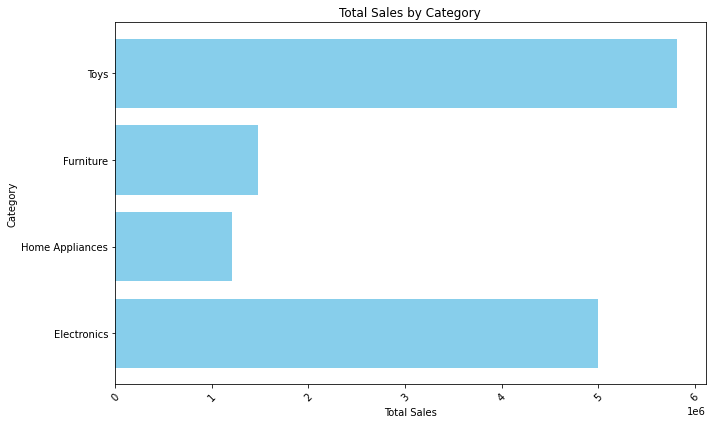

In [0]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for visualization
pdf_category_sales = df_category_sales.toPandas()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(pdf_category_sales['Category'], pdf_category_sales['total_sales'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

### Category wise monthly sales

In [0]:
from pyspark.sql.functions import month, round

df_sales_products = df_sales.join(df_products, df_sales.ProductID == df_products.ProductID, "inner")
df_sales_products = df_sales_products.withColumn("Month", month(df_sales_products.Timestamp))
df_monthly_category_sales = df_sales_products.groupBy("Category", "Month").agg({"SalesAmount": "sum"}).withColumnRenamed("sum(SalesAmount)", "total_sales").withColumn("total_sales", round("total_sales", 2))
display(df_monthly_category_sales.sort("Category", "Month"))

Category,Month,total_sales
Electronics,6,758804.83
Electronics,7,722390.56
Electronics,8,971615.99
Electronics,9,1025216.52
Electronics,10,818045.85
Electronics,11,703141.32
Furniture,6,297048.38
Furniture,7,219800.62
Furniture,8,378544.9
Furniture,9,151967.23


In [0]:
df_customers.printSchema()

root
 |-- customerid: string (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- ssn: string (nullable = true)
 |-- region: string (nullable = true)



In [0]:
df_sales.printSchema()

root
 |-- SaleID: string (nullable = true)
 |-- ProductID: integer (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- SalesAmount: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Timestamp: timestamp (nullable = true)



In [0]:
from pyspark.sql.functions import *

### Region wise Total Sales

In [0]:
# Sales by Region
sales_by_region = df_sales.join(df_customers, df_sales.CustomerID == df_customers.customerid) \
    .groupBy("region").agg(
        round(sum("SalesAmount"),2).alias("TotalSalesAmount"),
        sum("Quantity").alias("TotalQuantity"),
        count("SaleID").alias("TotalTransactions")
    ).orderBy("TotalSalesAmount", ascending=False)
    
display(sales_by_region)

region,TotalSalesAmount,TotalQuantity,TotalTransactions
New York,5186468.49,89585,3574
Texas,2633863.36,44289,1759
Ohio,2389636.35,42325,1684
California,2383982.57,45413,1770
Unknown,913344.75,15474,610


Databricks visualization. Run in Databricks to view.

In [0]:
# Sales by Gender
sales_by_gender = df_sales.join(df_customers, df_sales.CustomerID == df_customers.customerid) \
    .groupBy("gender").agg(
        round(sum("SalesAmount"),2).alias("TotalSalesAmount"),
        sum("Quantity").alias("TotalQuantity"),
        count("SaleID").alias("TotalTransactions")
    ).orderBy("TotalSalesAmount", ascending=False)

display(sales_by_gender)

gender,TotalSalesAmount,TotalQuantity,TotalTransactions
Male,1.072211625E7,185578,7368
Female,2785179.27,51508,2029


Databricks visualization. Run in Databricks to view.

In [0]:
# Top Selling Products by Quantity with Product Name
top_products_by_quantity = df_sales.groupBy("ProductID").agg(
    sum("Quantity").alias("TotalQuantitySold")
).join(df_products, "ProductID").select("ProductName", "TotalQuantitySold").orderBy("TotalQuantitySold", ascending=False)

display(top_products_by_quantity)

ProductName,TotalQuantitySold
Drone,5483
Chair,5481
Board Game,5395
Doll,5360
Swing,5352
Bicycle,5341
Cupboard,5327
Puzzle,5277
Smart Glasses,5202
Blender,5152


In [0]:
# product region-wise, category-wise monthly sales

# Join df_sales with df_customers to get gender and region
df_sales_customers = df_sales.join(df_customers, df_sales.CustomerID == df_customers.customerid, "inner") \
                             .select("SaleID", "ProductID", df_sales.CustomerID, "gender", "region", "Quantity", "SalesAmount", "Timestamp")

# Join with df_products to get product category
df_full_data = df_sales_customers.join(df_products, df_sales_customers.ProductID == df_products.ProductID, "inner") \
                                 .select("SaleID", df_sales_customers.ProductID, "CustomerID", "gender", "region", "Quantity", "SalesAmount", "Category", "Timestamp")

# Extract Year and Month from Timestamp column
df_full_data_with_date = df_full_data.withColumn("Year", year("Timestamp")) \
                                     .withColumn("Month", month("Timestamp"))




### Region, Category, Year, and Month, and calculate total sales and quantity

In [0]:
# Group by Region, Category, Year, and Month, and calculate total sales and quantity
df_monthly_sales_region_category = df_full_data_with_date.groupBy("region", "Category", "Year", "Month").agg(
    round(sum("SalesAmount"), 2).alias("TotalSales"),
    sum("Quantity").alias("TotalQuantity")
).orderBy("Year", "Month", "region", "Category")

# Display the results
display(df_monthly_sales_region_category)

region,Category,Year,Month,TotalSales,TotalQuantity
California,Electronics,2024,6,150130.55,3749
California,Furniture,2024,6,32680.9,961
California,Home Appliances,2024,6,26960.34,805
California,Toys,2024,6,148703.34,3204
New York,Electronics,2024,6,332730.52,5590
New York,Furniture,2024,6,142299.28,2091
New York,Home Appliances,2024,6,60756.7,1501
New York,Toys,2024,6,334404.03,5466
Ohio,Electronics,2024,6,92304.06,2303
Ohio,Furniture,2024,6,91638.54,688
